In [1]:
# preformatting remove later
#df = pd.read_csv('../data/Press_Directories_1846_1920_JISC.csv', index_col=0)
#df.rename({'S-TITLE':'TITLE','S-POL':'POLITICS',
#           'COUNTY':'COUNTY_PUB','S-PRICE':'PRICE',
#           'D-EST':'ESTABLISHED_DATE','D-PUB':'PUBLICATION_DAY','E-LOC':'LOCATIONS',
#           'E-PER':'PERSONS','E-ORG':'ORGANISATIONS',
#           'year':'YEAR','chain_id':'NEWSPAPER_ID','JISC':'IN_JISC',
#           'TEXT':'TEXT_ORIGINAL'},axis=1, inplace=True)
#df.drop(['S-TITLE-ALT'],axis=1,inplace=True)
#df.to_csv('../data/Press_Directories_1846_1920_JISC_final.csv')

# Sources and Data

Code for reproducing images for the section "Sources and Data". 
Notebook that generally describes the outline of both Mitchell and JISC corpus.

## Load data and import packages

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from pathlib import Path
sns.set()

In [3]:
df = pd.read_csv('../data/Press_Directories_1846_1920_JISC_final.csv', index_col=0)
df.head(2)

,index,id,TITLE,POLITICS,CATEGORY,DISTRICT,DISTRICT_PUB,COUNTY_PUB,PRICE,ESTABLISHED_DATE,PUBLICATION_DAY,LOCATIONS,ORGANISATIONS,PERSONS,TEXT_ORIGINAL,DISTRICT_DESCRIPTION,YEAR,NEWSPAPER_ID,IN_JISC
0,0,MPD_1846_0,MORNING ADVERTISER .,liberal,london,london,london,london,5d,"February 8 , 1793",Daily,NaN,NaN,David,"MORNING ADVERTISER . Daily , Price 5d . Establ...",London,1846,CID_000570,0
1,1,MPD_1846_1,MORNING CHRONILE .,moderate;,london,london,london,london,5d,1770,Daily,",<SEP>332",NaN,Henry<SEP>William Wills,"MORNING CHRONILE . Daily , Price 5d . Establis...",London,1846,CID_004428,0


In [4]:
jisc_meta = pd.read_excel('../data/JISC_TitleList.xlsx', sheet_name='Titles')
jisc_meta.head(2)

,Newspaper Title,System ID,NLP,CATEGORY,JISC,Normalised Title,Abbr,Start_day,Start_month,Start_year,End_day,End_month,End_year
0,Aberdeen Journal and general advertiser for th...,13921360,31,scottish,JISC1,Aberdeen Journal,ANJO,1,Jan,1800,23,Aug,1876
1,Aberdeen Weekly Journal and general advertiser...,13921362,32,scottish,JISC1,Aberdeen Journal,ANJO,30,Aug,1876,31,Dec,1900


In [5]:
# set path for storing the images
figures_path = Path('figures')
figures_path.mkdir(exist_ok=True)

## Figure 3

In [6]:
df_london = df[df.CATEGORY=='london']

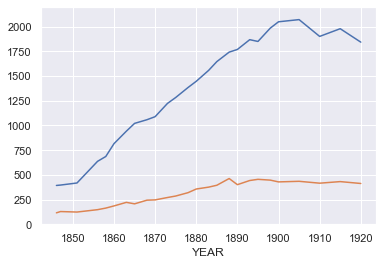

In [7]:
df_prov = df[df.CATEGORY.isin(['irish','welsh','provincial','scottish'])]
df_prov.groupby('YEAR')['id'].count().plot(ylim=(0,2200))
fig = df_london.groupby('YEAR')['id'].count().plot().get_figure()

fig.savefig(figures_path / 'figure_3.png')

## Figure 4

In [8]:
year2jisc_counts = {}

jsp = jisc_meta[jisc_meta.CATEGORY.isin(['scottish','welsh','provincial','irish'])]
for y in df_prov.YEAR.unique():
    if y <= 1900:
        year2jisc_counts[y] = jsp[(jsp.Start_year < y) &  (jsp.End_year >= y) ].shape[0]

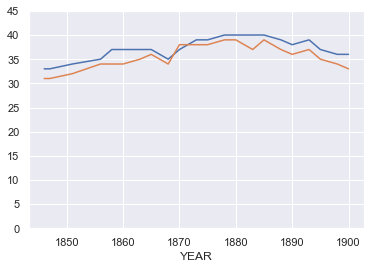

In [9]:
pd.Series(year2jisc_counts).plot(ylim=(0,45))
fig = df_prov[(df_prov.IN_JISC > 0) & (df_prov.YEAR <= 1900)].groupby('YEAR').id.count().plot().get_figure()
fig.savefig(figures_path / 'figure_4_l.png')

In [10]:
df_prov[(df_prov.IN_JISC > 0) & (df_prov.YEAR <= 1900)].groupby('YEAR').id.count()

YEAR
1846    31
1847    31
1851    32
1856    34
1858    34
1860    34
1863    35
1865    36
1868    34
1870    38
1873    38
1875    38
1878    39
1880    39
1883    37
1885    39
1888    37
1890    36
1893    37
1895    35
1898    34
1900    33
Name: id, dtype: int64

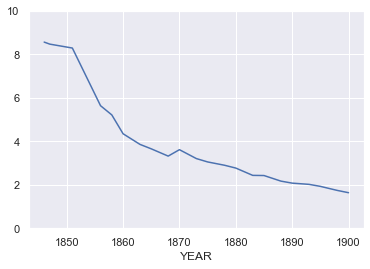

In [11]:
nom = df_prov[(df_prov.IN_JISC > 0) & (df_prov.YEAR <= 1900)].groupby('YEAR')['id'].count() 
denom = df_prov[~(df_prov.IN_JISC > 0) & (df_prov.YEAR <= 1900)].groupby('YEAR')['id'].count() 
fig = ((nom / denom )* 100).plot(ylim=(0,10)).get_figure()
fig.savefig(figures_path / 'figure_4_r.png')

In [12]:
print('All done!')

All done!


# Fin.